# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = '../data/traffic-signs-data/train.p'
validation_file= '../data/traffic-signs-data/valid.p'
testing_file = '../data/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:3]

# How many unique classes/labels there are in the dataset.
print("\n\nTrain labels type:", type(y_train), "\n\n")
print("shape of training labels: ", y_train.shape)
print("shape of testing labels: ", y_test.shape)
print("shape of validation labels: ", y_valid.shape)
all_y = np.concatenate([y_train, y_valid, y_test])
unique_y = np.unique(all_y)
sorted_unique_y = np.sort(unique_y)
n_classes = unique_y.shape

print("\n\n")


print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

print("classes are: ", sorted_unique_y)



Train labels type: <class 'numpy.ndarray'> 


shape of training labels:  (34799,)
shape of testing labels:  (12630,)
shape of validation labels:  (4410,)



Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = (43,)
classes are:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
import csv
import pprint

pp = pprint.PrettyPrinter()

class_dict = dict()
class_list = None

with open('signnames.csv', newline='') as file:
    class_list = list(csv.reader(file))
    
for pair in class_list:
    try:
        class_dict[int(pair[0])] = pair[1]
    except:
        print("could not use ", pair[0], " as an integer key")


pp.pprint(class_dict)

could not use  ClassId  as an integer key
{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn l

{0: 9960,
 1: 2220,
 2: 31439,
 3: 5370,
 4: 6810,
 5: 12360,
 6: 21450,
 7: 23730,
 8: 15870,
 9: 11040,
 10: 17130,
 11: 8580,
 12: 27329,
 13: 21810,
 14: 29219,
 15: 29909,
 16: 5010,
 17: 30449,
 18: 20370,
 19: 6630,
 20: 25950,
 21: 25680,
 22: 4500,
 23: 1770,
 24: 10800,
 25: 33449,
 26: 1230,
 27: 10350,
 28: 26849,
 29: 10560,
 30: 25020,
 31: 210,
 32: 10140,
 33: 26250,
 34: 20010,
 35: 18930,
 36: 900,
 37: 4830,
 38: 14010,
 39: 25410,
 40: 4200,
 41: 0,
 42: 9750}


NameError: name 'index' is not defined

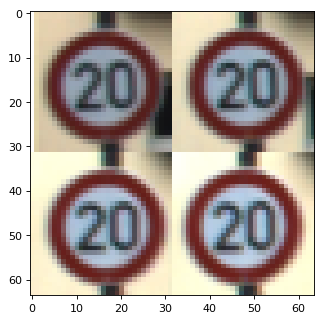

In [4]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

occurence_dict = dict()
first_occurence_dict = dict()

for i in range(43):
    occurence_dict[i] = np.where(y_train == i)
    first_occurence_dict[i] = occurence_dict[i][0][0]

pp.pprint(first_occurence_dict)

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    
sp = 331

for i in range(43):
    
    plt.subplot(sp)
    
    index1 = occurence_dict[i][0][0]
    index2 = occurence_dict[i][0][1]
    index3 = occurence_dict[i][0][2]
    index4 = occurence_dict[i][0][3]
    
    image1 = X_train[index1,:,:,:]
    image2 = X_train[index2,:,:,:]
    image3 = X_train[index3,:,:,:]
    image4 = X_train[index4,:,:,:]
    
    image12 = np.concatenate((image1, image2), axis=1)
    image34 = np.concatenate((image3, image4), axis=1)
    
    image1234 = np.concatenate((image12, image34), axis=0)
    
    plt.imshow(image1234)
    plt.title(str(y_train[index])+ " " + class_dict[y_train[index]])
    
    if sp == 339:
        fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
        sp = 330
    
    sp = sp + 1
    


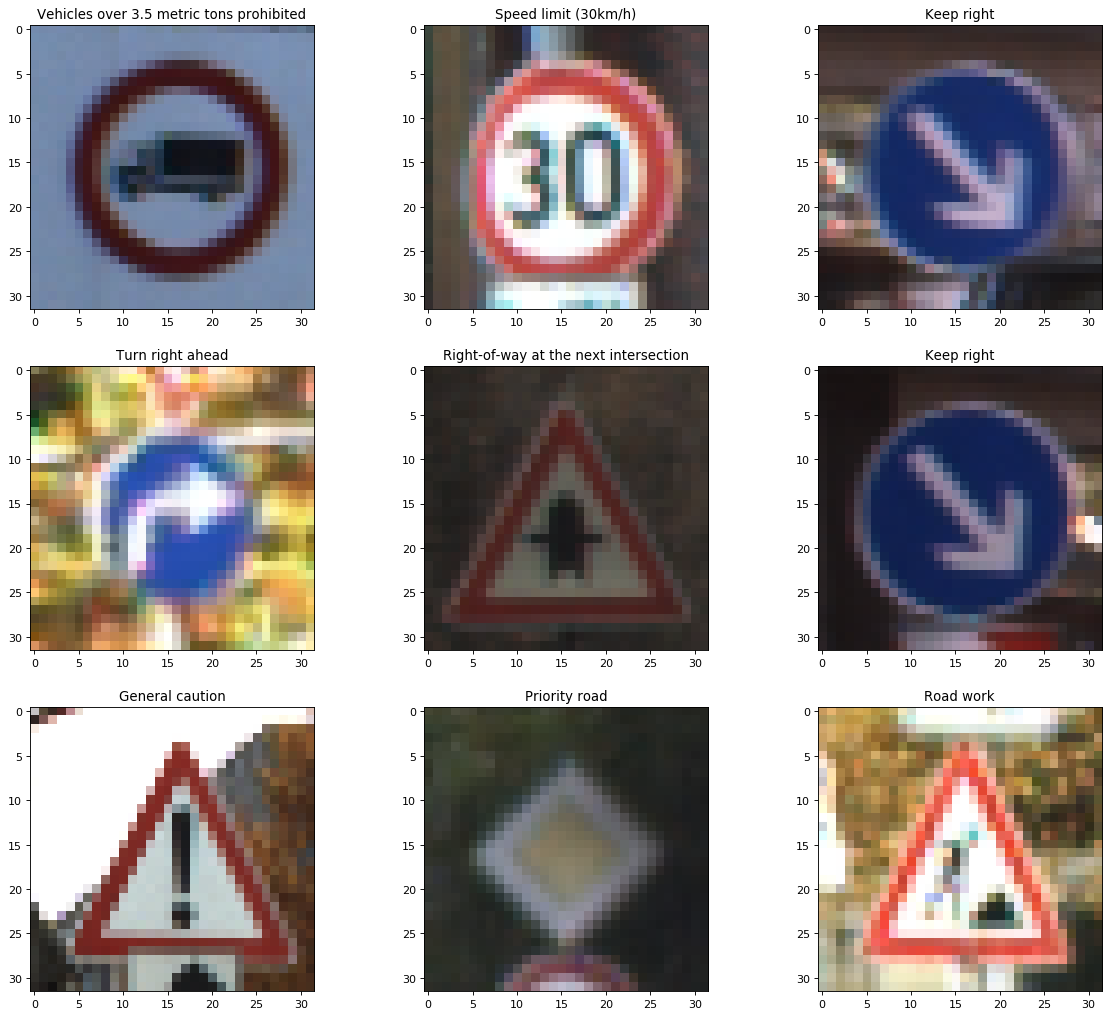

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.


label_dist_train = np.zeros(n_classes, dtype=int)
label_dist_valid = np.zeros(n_classes, dtype=int)
label_dist_test = np.zeros(n_classes, dtype=int)

for i in range(43): #labels are 0 through 42
    label_dist_train[i] = (y_train == i).sum()
    
for i in range(43): #labels are 0 through 42
    label_dist_test[i] = (y_test == i).sum()
    
for i in range(43): #labels are 0 through 42
    label_dist_valid[i] = (y_valid == i).sum()

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    
sp = 331
    
for i in range(9):
    plt.subplot(sp+i)
    plt.imshow(X_test[i,:,:,:])
    plt.title(class_dict[y_test[i]])

Text(0.5,1,'Normalized Number of Samples by Class ID')

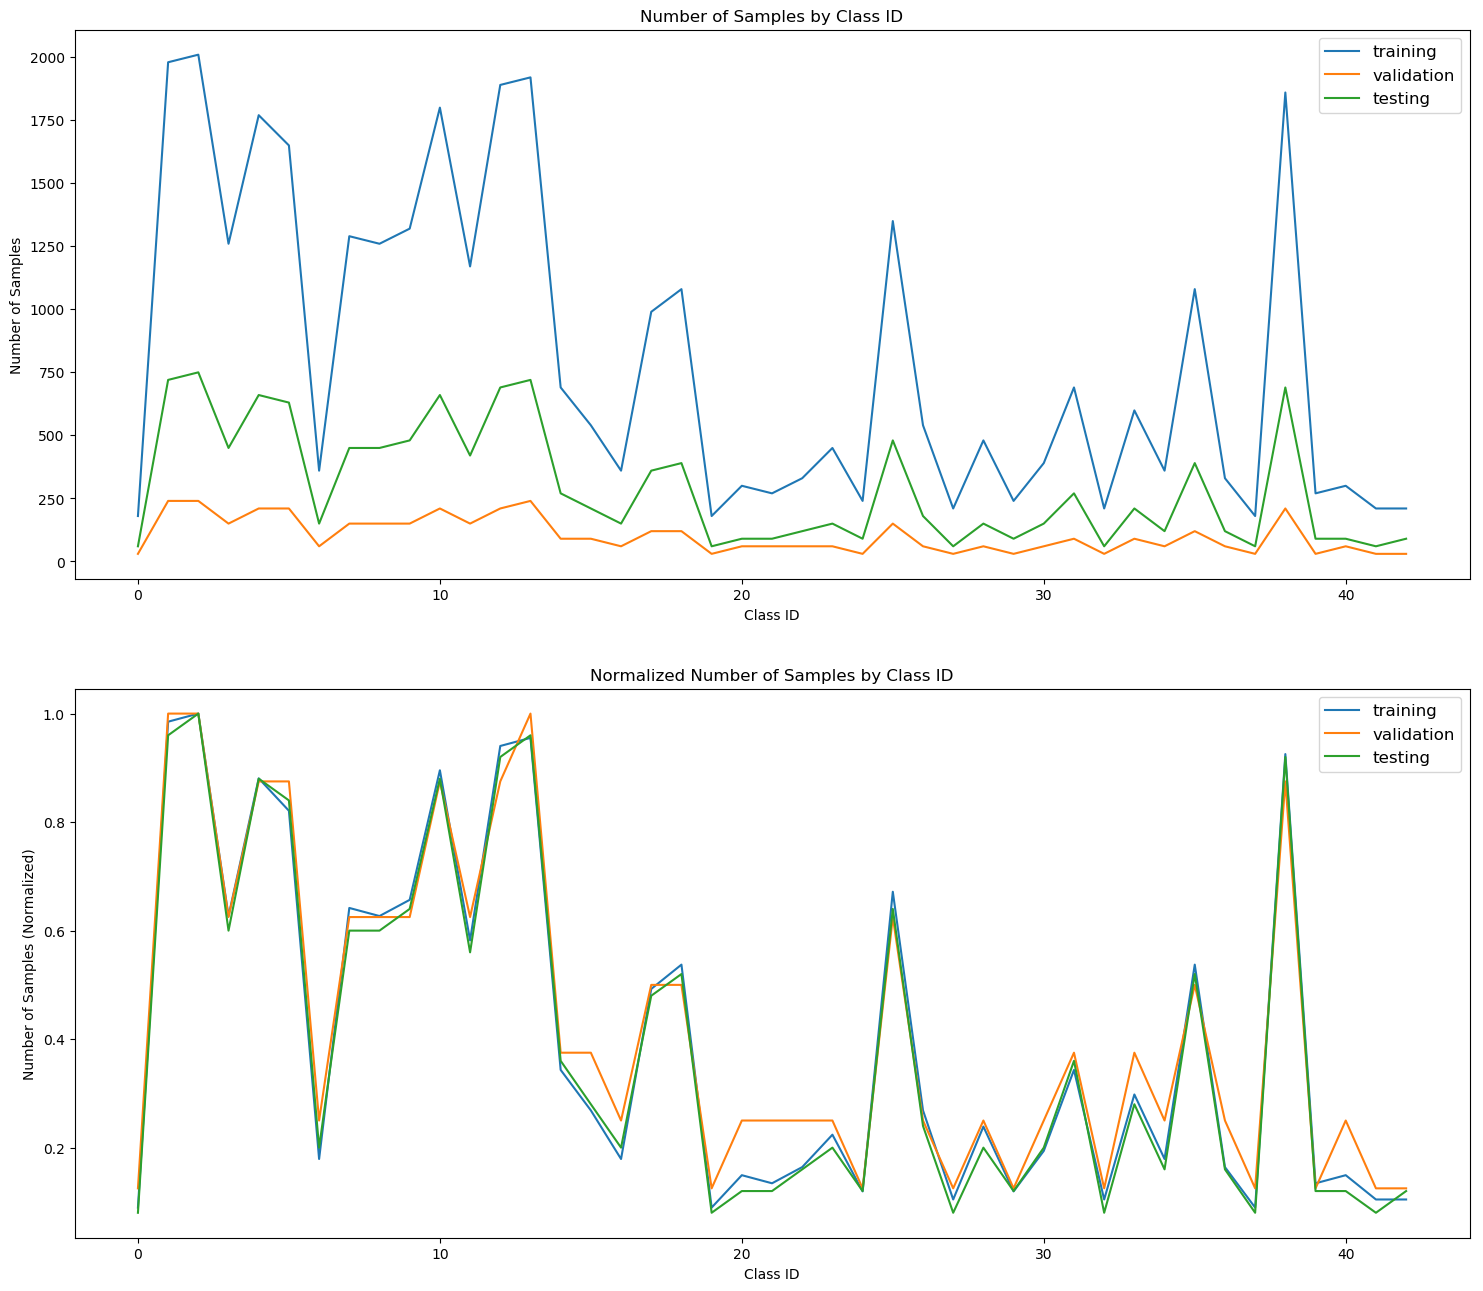

In [6]:
fig=plt.figure(figsize=(18, 16), dpi= 100, facecolor='w', edgecolor='k')
    
plt.subplot(211)

plt.plot(label_dist_train, label='training')
plt.plot(label_dist_valid, label='validation')
plt.plot(label_dist_test, label='testing')

plt.xlabel("Class ID")
plt.ylabel("Number of Samples")

plt.title("Number of Samples by Class ID")

plt.legend(loc='upper right', fontsize=12)

plt.subplot(212)

plt.plot(label_dist_train / np.max(label_dist_train), label='training')
plt.plot(label_dist_valid / np.max(label_dist_valid), label='validation')
plt.plot(label_dist_test / np.max(label_dist_test), label='testing')

plt.xlabel("Class ID")
plt.ylabel("Number of Samples (Normalized)")
plt.legend(loc='upper right', fontsize=12)

plt.title("Normalized Number of Samples by Class ID")


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

unprocessed image data type:  uint8
old std dev:  66.133934
new std dev:  1.0000001
old std dev:  68.05853
new std dev:  1.0000005
old std dev:  66.74195
new std dev:  1.0000002
grey image data type:  float32
pp data type:  float32
'first image data (train): '
array([[25.783, 24.783, 24.669, ..., 28.74 , 27.968, 28.082],
       [26.783, 25.37 , 25.37 , ..., 28.74 , 27.854, 27.669],
       [26.598, 25.37 , 25.071, ..., 28.74 , 27.854, 27.669],
       ...,
       [24.783, 25.783, 26.381, ..., 24.783, 24.968, 25.854],
       [24.495, 25.495, 26.68 , ..., 24.783, 24.968, 24.854],
       [24.794, 25.794, 26.278, ..., 24.669, 23.968, 22.968]],
      dtype=float32)
'first image data (train): '
array([[0.3898604 , 0.37473956, 0.37301576, ..., 0.43457267, 0.4228994 ,
        0.42462316],
       [0.40498123, 0.3836155 , 0.3836155 , ..., 0.43457267, 0.4211756 ,
        0.41837826],
       [0.40218383, 0.3836155 , 0.37909433, ..., 0.43457267, 0.4211756 ,
        0.41837826],
       ...,
       [0.

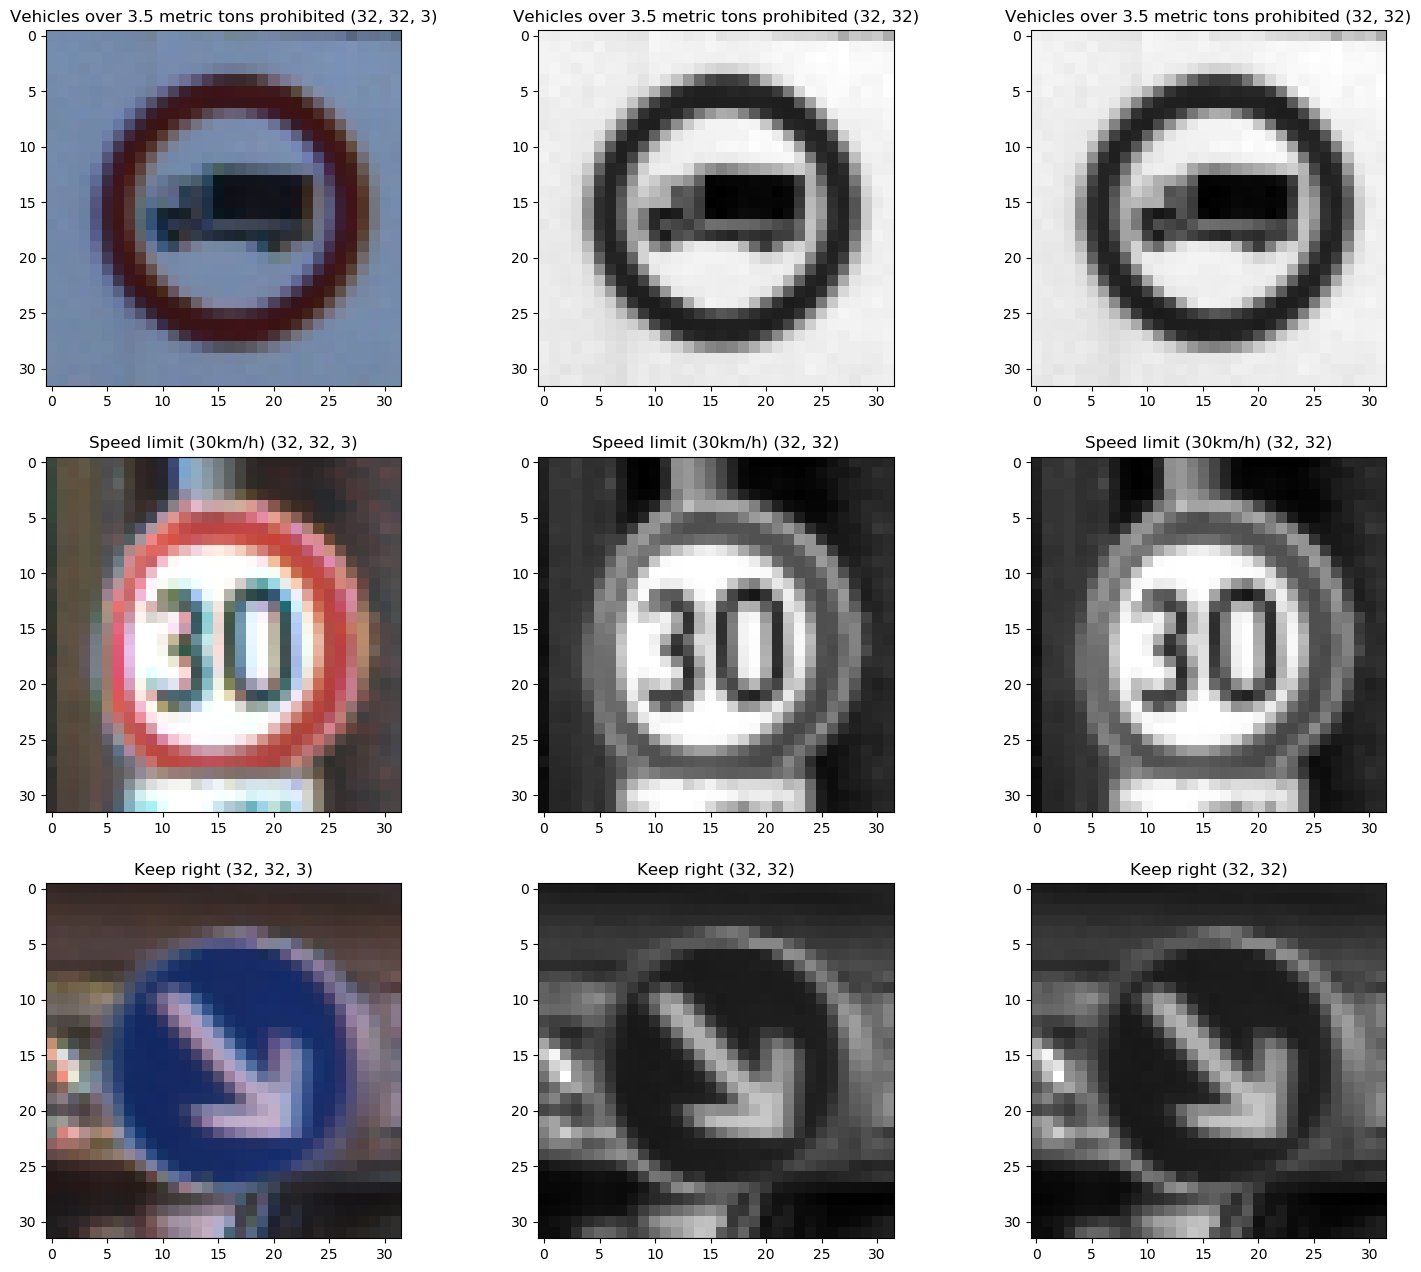

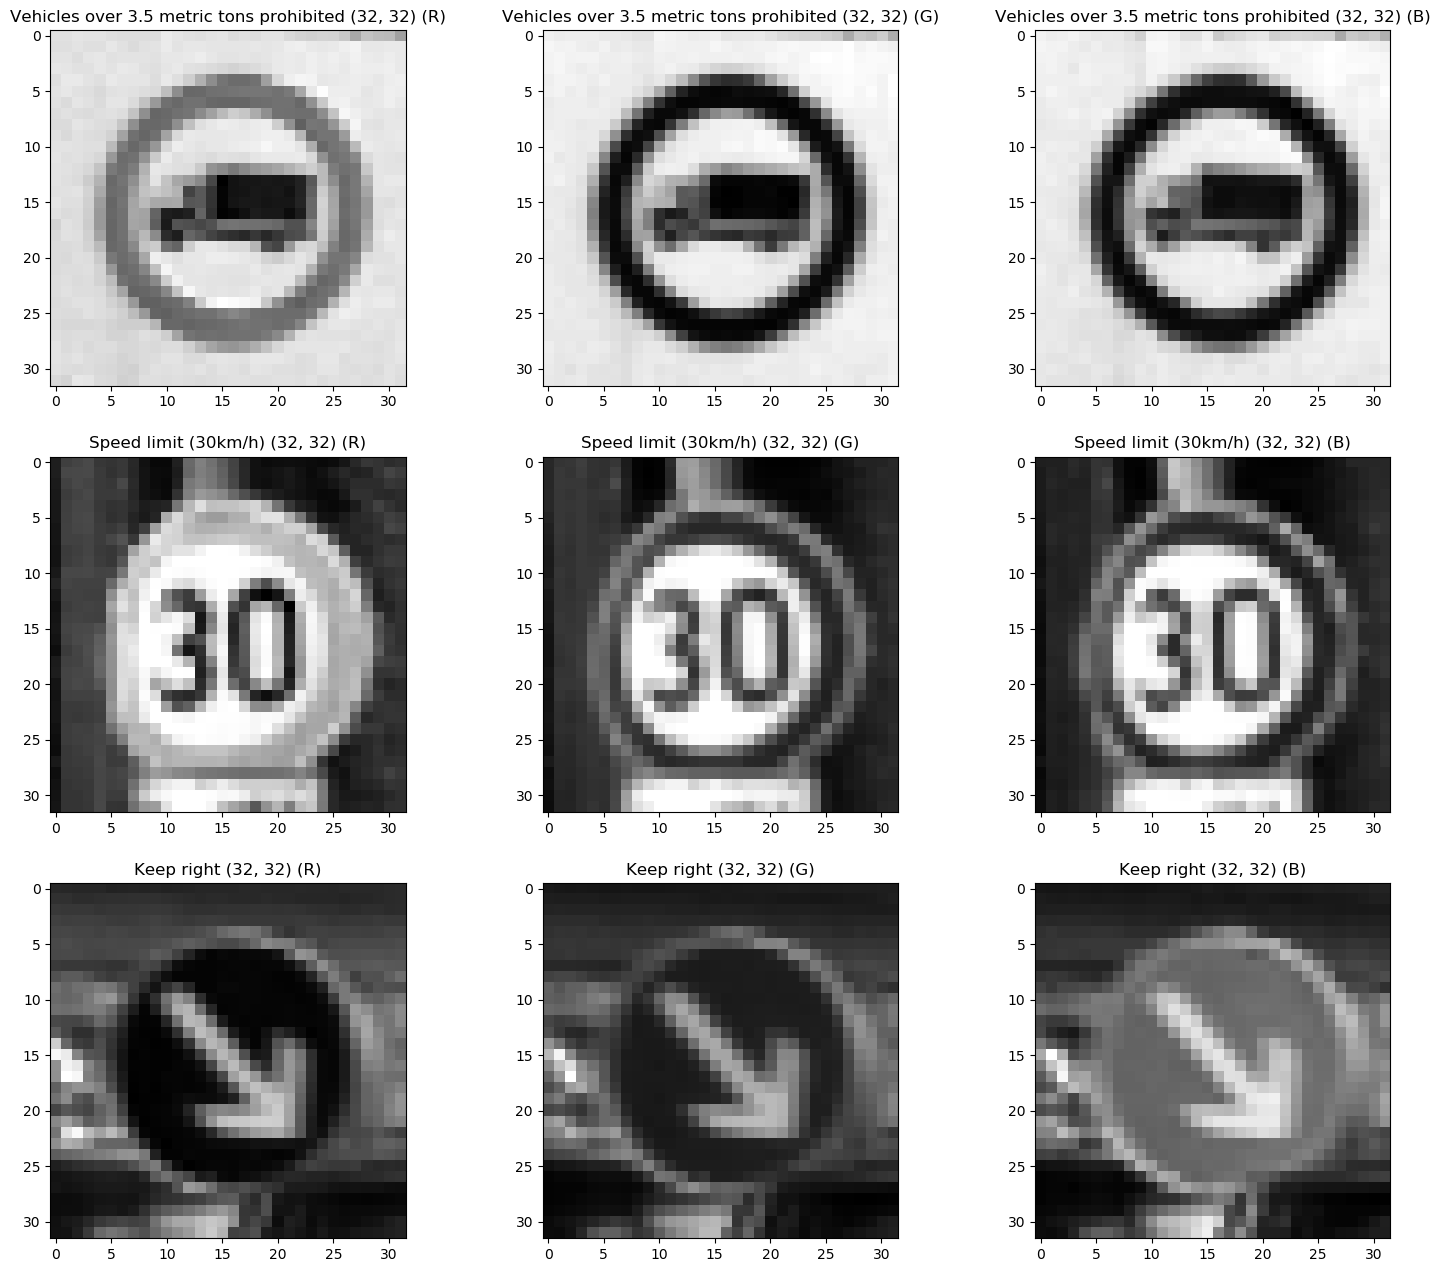

In [7]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.


#data normalization

#convert all images to greyscale

def make_grey(image_data):
    # just taking the average doesn't work well - the resultant greyscale images look bad
    # matlab documentation here: https://www.mathworks.com/help/matlab/ref/rgb2gray.html
    # indicates that this is the way to calculate luminance per Rec.ITU-R BT.601-7
    return ((0.2990 * image_data[:,:,:,0] + 0.5870 * image_data[:,:,:,1] + 0.1140 * image_data[:,:,:,2]) ).astype(np.float32)

def preprocess(image_data):
    image_data_min = np.min(image_data)
    image_data_max = np.max(image_data)
    image_data_mean = np.mean(image_data)
    image_data_stddev = np.std(image_data)
    zero_mean = image_data - image_data_mean  #has zero mean
    new_std_dev = 1.0
    stddev_adj = image_data * (new_std_dev / image_data_stddev)
    print("old std dev: ", image_data_stddev)
    print("new std dev: ", np.std(stddev_adj))
    return stddev_adj


print("unprocessed image data type: ", X_train.dtype)

X_train_grey = make_grey(X_train)
X_valid_grey = make_grey(X_valid)
X_test_grey = make_grey(X_test)

X_train_pp = preprocess(X_train_grey)
X_valid_pp = preprocess(X_valid_grey)
X_test_pp = preprocess(X_test_grey)

print("grey image data type: ", X_train_grey.dtype)
print("pp data type: ", X_train_pp.dtype)

pp.pprint("first image data (train): ")
pp.pprint(X_train_grey[0,:,:])

pp.pprint("first image data (train): ")
pp.pprint(X_train_pp[0,:,:])

fig=plt.figure(figsize=(18, 16), dpi= 100, facecolor='w', edgecolor='k')

sp = 331
    
for i in range(3):
    plt.subplot(sp+3*i)  #plot the colour image
    plt.imshow(X_test[i,:,:])
    plt.title(class_dict[y_test[i]] + " " + str(X_test[i,:,:].shape))
    
    plt.subplot(sp+3*i+1)  #plot the greyscale
    plt.imshow(X_test_grey[i,:,:], cmap='gray')
    plt.title(class_dict[y_test[i]] + " " + str(X_test_grey[i,:,:].shape))
    
    plt.subplot(sp+3*i+2)  #plot the greyscale + normalized data (should look the same here but work better for training)
    plt.imshow(X_test_pp[i,:,:], cmap='gray')
    plt.title(class_dict[y_test[i]] + " " + str(X_test_pp[i,:,:].shape))

fig=plt.figure(figsize=(18, 16), dpi= 100, facecolor='w', edgecolor='k')

sp = 331
    
for i in range(3):
    plt.subplot(sp+3*i)  #plot the red channel
    plt.imshow(X_test[i,:,:,0], cmap='gray')
    plt.title(class_dict[y_test[i]] + " " + str(X_test[i,:,:,0].shape) + " (R)")
    
    plt.subplot(sp + 3*i + 1)  #plot the green channel
    plt.imshow(X_test[i,:,:,1], cmap='gray')
    plt.title(class_dict[y_test[i]] + " " + str(X_test[i,:,:,1].shape) + " (G)")
    
    plt.subplot(sp + 3*i + 2)  #plot the green channel
    plt.imshow(X_test[i,:,:,2], cmap='gray')
    plt.title(class_dict[y_test[i]] + " " + str(X_test[i,:,:,2].shape) + " (B)")


### Model Architecture

In [8]:
import tensorflow as tf

tf.set_random_seed(1)

### Define your architecture here.
### Feel free to use as many code cells as needed.

def get_network(x):
    
    mu = 0
    sigma = 0.1

    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    conv1 = tf.nn.relu(conv1)

    #conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    conv2 = tf.nn.relu(conv2)

    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    fc0   = tf.contrib.layers.flatten(conv2)
    
    fc0b   = tf.contrib.layers.flatten(conv1)
    
    print("fc0 dtype:", fc0.dtype )
    print("fc0b dtype:", fc0b.dtype )
    
    fc0c = tf.concat([fc0, fc0b], 1)

    fc1_W = tf.Variable(tf.truncated_normal(shape=(13*13*16 + 30*30*6, 200), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(200))
    fc1   = tf.matmul(fc0c, fc1_W) + fc1_b

    fc1    = tf.nn.relu(fc1)

    fc2_W  = tf.Variable(tf.truncated_normal(shape=(200, 400), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(400))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    fc2    = tf.nn.relu(fc2)
    
    fc2B_W = tf.Variable(tf.truncated_normal(shape=(400, 600), mean = mu, stddev = sigma))
    fc2B_b  = tf.Variable(tf.zeros(600))
    fc2B    = tf.matmul(fc2, fc2B_W) + fc2B_b
    
    
    
    fc2C_W = tf.Variable(tf.truncated_normal(shape=(600, 400), mean = mu, stddev = sigma))
    fc2C_b  = tf.Variable(tf.zeros(400))
    fc2C    = tf.matmul(fc2B, fc2C_W) + fc2C_b

    fc3_W  = tf.Variable(tf.truncated_normal(shape=(400, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    
    fc3 = tf.matmul(fc2C, fc3_W) + fc3_b
    
    drop_out = tf.nn.dropout(fc3, keep_prob)
    
    logits = drop_out

    return conv1, conv2, logits
    

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [9]:
X = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

conv1, conv2, logits = get_network(X)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = 0.0001)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

fc0 dtype: <dtype: 'float32'>
fc0b dtype: <dtype: 'float32'>


In [10]:
from sklearn.utils import shuffle

In [11]:
# def calc_accuracy_by_class(batch_size, features, labels):
    
#     sess = tf.get_default_session()
    
#     total_accuracy = 0
    
#     for feature, label in zip(features, labels):
#         prediction = 
        
    
#     for offset in range(0, len(features), batch_size):
#         end = offset + batch_size
#         batch_x, batch_y = features[offset:end], labels[offset:end]
#         accuracy = sess.run(accuracy_operation, feed_dict={X: batch_x, y: batch_y, keep_prob : 1.0})
#         total_accuracy += (accuracy * len(batch_x))
        
#     nn_accuracy = total_accuracy / len(features)
    
#     return nn_accuracy

def calc_accuracy(batch_size, features, labels):
    
    sess = tf.get_default_session()
    
    total_accuracy = 0
    
    for offset in range(0, len(features), batch_size):
        end = offset + batch_size
        batch_x, batch_y = features[offset:end], labels[offset:end]
        accuracy = sess.run(accuracy_operation, feed_dict={X: batch_x, y: batch_y, keep_prob : 1.0})
        total_accuracy += (accuracy * len(batch_x))
        
    nn_accuracy = total_accuracy / len(features)
    
    return nn_accuracy

def train_and_validate(num_epochs, batch_size, train_data, train_labels, valid_data, valid_labels ):

    print('num training examples: ', len(train_data), " ", len(train_labels))
    print('num validation examples: ', len(valid_data), " ", len(valid_labels))
    
    print('training data min/max: ', np.min(train_data), "/", np.max(train_data))
    print('training data min/max: ', np.min(valid_data), "/", np.max(valid_data))
    
    valid_accuracies = []
    train_accuracies = []
    
    with tf.Session() as sess:
        
        init = tf.global_variables_initializer()
        sess.run(init)

        for i in range(num_epochs):
            print("starting epoch {} ...".format(i+1))
            features, labels = shuffle(train_data, train_labels)
            for offset in range(0, n_train, batch_size):
                end = offset + batch_size
                batch_x, batch_y = train_data[offset:end], train_labels[offset:end]
                sess.run(training_operation, feed_dict={X: batch_x, y: batch_y, keep_prob: 0.25})


            #calculate accuracy on the validation set
            print("finished training, testing on validation set...")

            validation_accuracy = calc_accuracy(batch_size, valid_data, valid_labels)
            
            valid_accuracies.append(validation_accuracy)

            print("finished validation set testing, testing on training set...")

            training_accuracy = calc_accuracy(batch_size, train_data, train_labels)
            
            train_accuracies.append(training_accuracy)


            print("finished epoch {} ...".format(i+1))
            print("Validation Accuracy = {:.6f}".format(validation_accuracy))
            print("Training Accuracy = {:.6f}".format(training_accuracy))
            print()
            
        

        saver.save(sess, './traff_sign_classifier')
        print("Model saved")
        
        return valid_accuracies, train_accuracies


In [49]:
num_epochs = 100
batch_size = 128

In [50]:

X_train_pp = np.reshape(X_train_pp, (X_train_pp.shape[0], X_train_pp.shape[1], X_train_pp.shape[2], 1))
X_valid_pp = np.reshape(X_valid_pp, (X_valid_pp.shape[0], X_valid_pp.shape[1], X_valid_pp.shape[2], 1))

valid_accuracies, train_accuracies = train_and_validate(num_epochs, batch_size, X_train_pp, y_train, X_valid_pp, y_valid)

#try it on the mnist data

# from tensorflow.examples.tutorials.mnist import input_data

# mnist = tf.examples.tutorials.mnist.input_data.read_data_sets("MNIST_data/", reshape=False)

# mnist_X_train, mnist_y_train           = mnist.train.images, mnist.train.labels
# mnist_X_validation, mnist_y_validation = mnist.validation.images, mnist.validation.labels
# mnist_X_test, mnist_y_test             = mnist.test.images, mnist.test.labels

# print("mnist type: ", mnist_X_train.dtype)
# print("mnist shape: ", mnist_X_train.shape)

# mnist_X_train      = np.pad(mnist_X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
# mnist_X_validation = np.pad(mnist_X_validation, ((0,0),(2,2),(2,2),(0,0)), 'constant')
# mnist_X_test       = np.pad(mnist_X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

# train_and_validate(num_epochs, batch_size, mnist_X_train, mnist_y_train, mnist_X_validation, mnist_y_validation)

### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.



num training examples:  34799   34799
num validation examples:  4410   4410
training data min/max:  0.051607396 / 3.8558118
training data min/max:  0.06651627 / 3.746775
starting epoch 1 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 1 ...
Validation Accuracy = 0.057823
Training Accuracy = 0.065577

starting epoch 2 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 2 ...
Validation Accuracy = 0.083673
Training Accuracy = 0.104026

starting epoch 3 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 3 ...
Validation Accuracy = 0.069615
Training Accuracy = 0.094917

starting epoch 4 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 4 ...
Validation Accuracy = 0.075964
Training Accurac

finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 39 ...
Validation Accuracy = 0.423810
Training Accuracy = 0.523406

starting epoch 40 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 40 ...
Validation Accuracy = 0.539683
Training Accuracy = 0.661370

starting epoch 41 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 41 ...
Validation Accuracy = 0.617007
Training Accuracy = 0.739073

starting epoch 42 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 42 ...
Validation Accuracy = 0.659637
Training Accuracy = 0.780166

starting epoch 43 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 43 ...
Validation Accurac

finished epoch 77 ...
Validation Accuracy = 0.756463
Training Accuracy = 0.897727

starting epoch 78 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 78 ...
Validation Accuracy = 0.787302
Training Accuracy = 0.925371

starting epoch 79 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 79 ...
Validation Accuracy = 0.787982
Training Accuracy = 0.920400

starting epoch 80 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 80 ...
Validation Accuracy = 0.793424
Training Accuracy = 0.935831

starting epoch 81 ...
finished training, testing on validation set...
finished validation set testing, testing on training set...
finished epoch 81 ...
Validation Accuracy = 0.804082
Training Accuracy = 0.935343

starting epoch 82 ...
finished training, testing on validation se

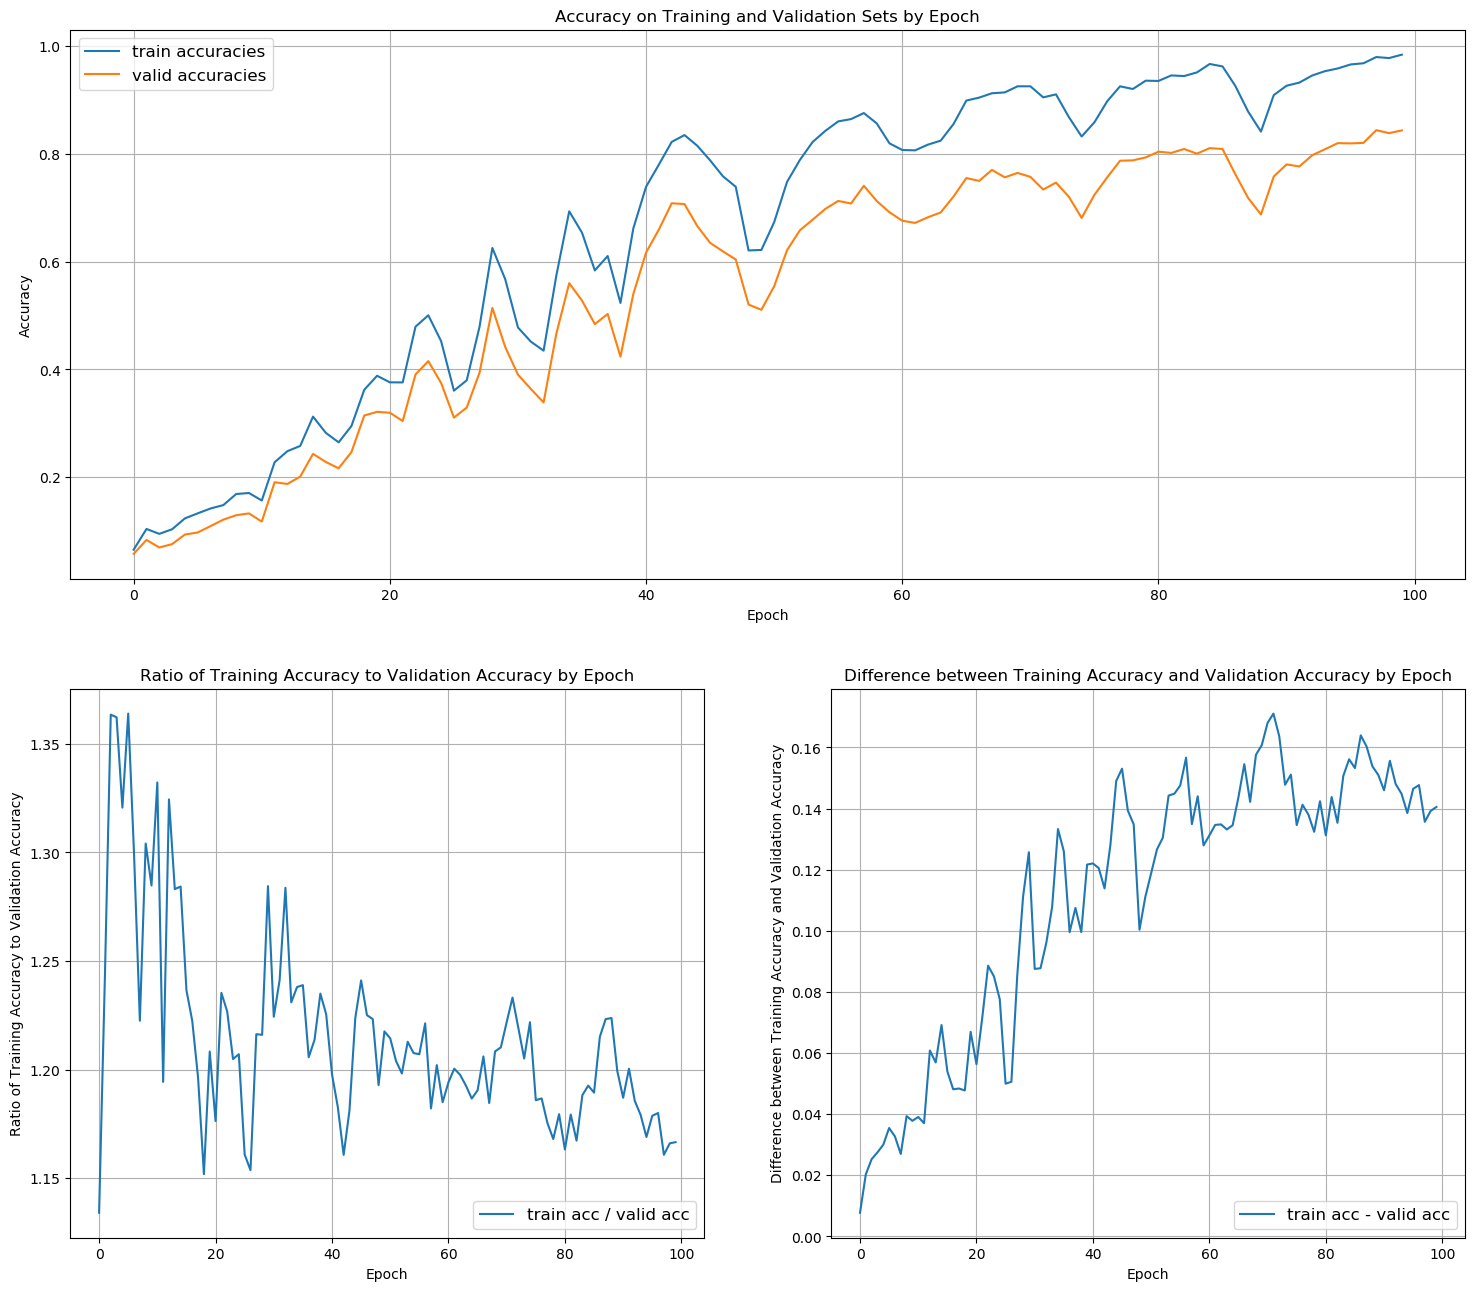

In [51]:

fig=plt.figure(figsize=(18, 16), dpi= 100, facecolor='w', edgecolor='k')

plt.subplot(211)

plt.plot(train_accuracies, label='train accuracies')
plt.plot(valid_accuracies, label='valid accuracies')

plt.grid()

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='upper left', fontsize=12)

plt.title("Accuracy on Training and Validation Sets by Epoch")


# the following two graphs should provide warning of overfitting 
#  (indicated by greater accuracy on training data than validation data)
plt.subplot(223)

plt.plot(np.divide(np.array(train_accuracies),np.array(valid_accuracies)) , label='train acc / valid acc')

plt.grid()

plt.xlabel("Epoch")
plt.ylabel("Ratio of Training Accuracy to Validation Accuracy")
plt.legend(loc='lower right', fontsize=12)

plt.title("Ratio of Training Accuracy to Validation Accuracy by Epoch")

plt.subplot(224)

plt.plot(np.array(train_accuracies) - np.array(valid_accuracies) , label='train acc - valid acc')

plt.xlabel("Epoch")
plt.ylabel("Difference between Training Accuracy and Validation Accuracy")
plt.legend(loc='lower right', fontsize=12)

plt.title("Difference between Training Accuracy and Validation Accuracy by Epoch")

plt.grid()

In [52]:
X_test_pp = np.reshape(X_test_pp, (X_test_pp.shape[0], X_test_pp.shape[1], X_test_pp.shape[2], 1))

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    saver.restore(sess, './traff_sign_classifier')
    
    test_accuracy = calc_accuracy(batch_size, X_test_pp, y_test)
    
    print("test accuracy: ", test_accuracy)

test accuracy:  0.8505146479096946


Text(0.5,1,'Accuracy by Class')

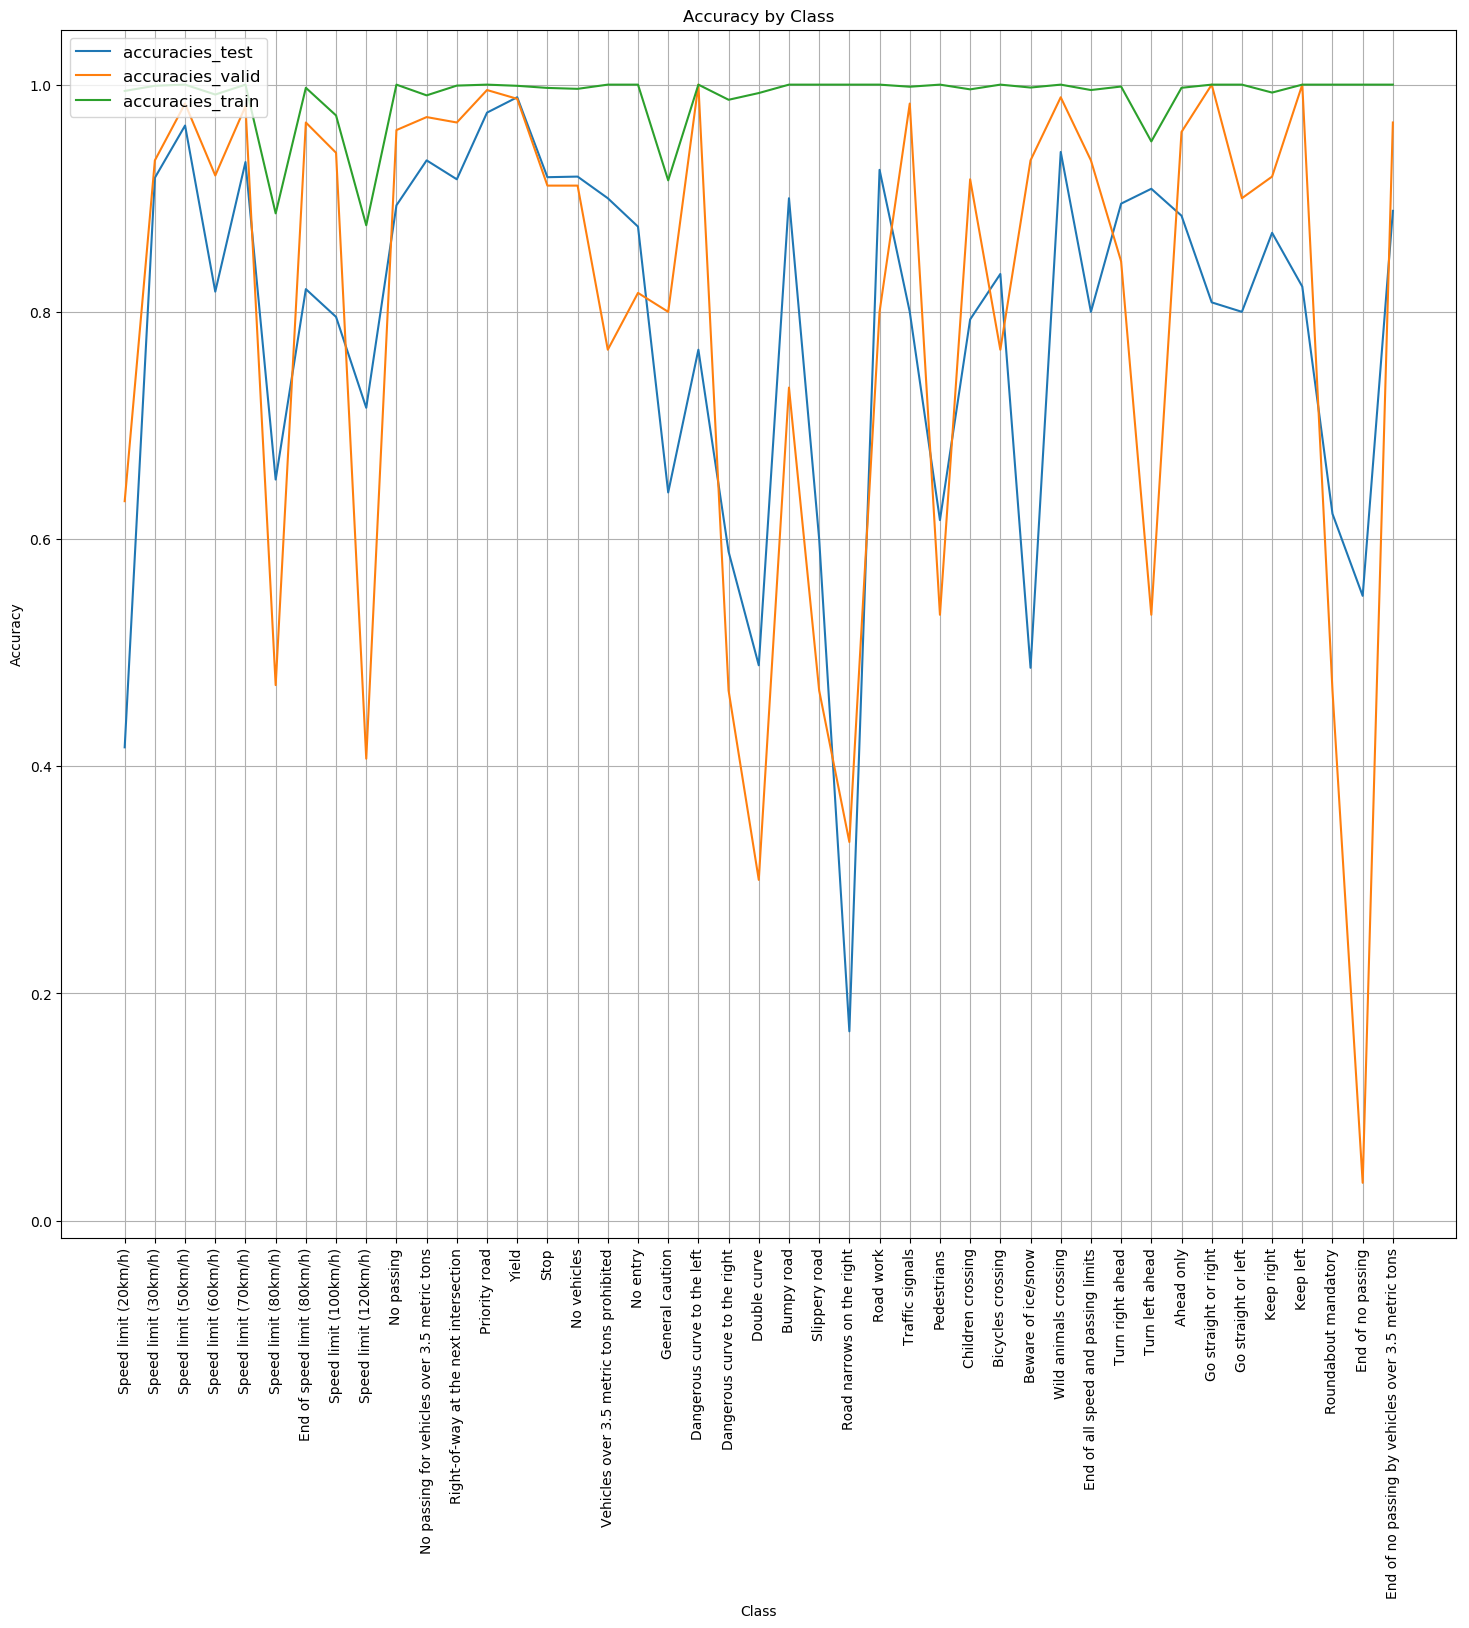

In [57]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

def get_accuracy_by_class(features, labels, batch_size):
    single_classifier = tf.nn.top_k(tf.nn.softmax(logits), k=5)

    correct_class_list = [0]*43
    total_class_list = [0]*43
    accuracy_class_list = []

    with tf.Session() as sess:
        init = tf.global_variables_initializer()
        sess.run(init)
        saver.restore(sess, './traff_sign_classifier')
        
        for offset in range(0, n_train, batch_size):
            end = offset + batch_size
            batch_x, batch_y = features[offset:end], labels[offset:end]
            output = sess.run(single_classifier, feed_dict={X: batch_x, keep_prob: 1.0})

            for img, top_probs, top_labels, correct_label in zip(batch_x, output.values, output.indices, batch_y):

        #         class_0 = class_dict[top_labels[0]] + " " + str(top_probs[0])
        #         class_1 = class_dict[top_labels[1]] + " " + str(top_probs[1])
        #         class_2 = class_dict[top_labels[2]] + " " + str(top_probs[2])
        #         class_3 = class_dict[top_labels[3]] + " " + str(top_probs[3])
        #         class_4 = class_dict[top_labels[4]] + " " + str(top_probs[4])
                if (top_labels[0] == correct_label):
                    correct_class_list[correct_label] = correct_class_list[correct_label] + 1

                total_class_list[correct_label] = total_class_list[correct_label] + 1

        for correct_count, total in zip(correct_class_list, total_class_list):
            accuracy_class_list.append(float(correct_count) / float(total))
    
    return accuracy_class_list, total_class_list
    

fig=plt.figure(figsize=(18, 16), dpi= 100, facecolor='w', edgecolor='k')

ax = plt.subplot(111)

accuracies_test, totals_test = get_accuracy_by_class(X_test_pp, y_test, 128)
accuracies_valid, totals_valid = get_accuracy_by_class(X_valid_pp, y_valid, 128)
accuracies_train, totals_train = get_accuracy_by_class(X_train_pp, y_train, 128)
    
width = 0.5

# plt.bar(np.arange(43)-width/2.0, accuracies_test, label='test accuracies', width=width)
# plt.bar(np.arange(43)+width/2.0, accuracies, label='test accuracies', width=width)

plt.plot(accuracies_test, label='accuracies_test')
plt.plot(accuracies_valid, label='accuracies_valid')
plt.plot(accuracies_train, label='accuracies_train')

labels = []

# for class_string, example_count in zip(list(class_dict.values()), totals_test):
#     labels.append(class_string + " " + str(example_count))

# plt.xticks(np.arange(43), labels, rotation='vertical')

ax.set_xticks(np.arange(43))
ax.set_xticklabels(list(class_dict.values()), rotation='vertical')

plt.grid()

plt.xlabel("Class")
plt.ylabel("Accuracy")
plt.legend(loc='upper left', fontsize=12)

plt.title("Accuracy by Class")





---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
import matplotlib.image as mpimg

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

imgs = np.array([
    mpimg.imread('images_from_the_web/30_kph_2-1.tif'),
    mpimg.imread('images_from_the_web/50_kph-1.tif'),
    mpimg.imread('images_from_the_web/50_kph_2-1.tif'),
    mpimg.imread('images_from_the_web/70_kph-1.tif'),
    mpimg.imread('images_from_the_web/do_not_enter-1.tif'),
    mpimg.imread('images_from_the_web/priority_road-1.tif'),
    mpimg.imread('images_from_the_web/yield-1.tif')
])

print("images shape: ", imgs.shape)

imgs_grey = make_grey(imgs)
imgs_pp = preprocess(imgs_grey)
imgs_pp_resized = np.reshape(imgs_pp, (imgs_pp.shape[0], imgs_pp.shape[1], imgs_pp.shape[2], 1))


### Predict the Sign Type for Each Image and Analyze Performance

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

single_classifier = tf.nn.top_k(tf.nn.softmax(logits), k=5)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    saver.restore(sess, './traff_sign_classifier')
    output = sess.run(single_classifier, feed_dict={X: imgs_pp_resized, keep_prob: 1.0})
    
    print("output is: ", output)
    print("output shape is: ", output.indices.shape)
    
    current_subplot = 331
    
    fig=plt.figure(figsize=(18, 20), dpi= 100, facecolor='w', edgecolor='k')
    
    for img, top_probs, top_labels in zip(imgs_pp, output.values, output.indices):
        
        plt.subplot(current_subplot)
        plt.imshow(img, cmap='gray')
        
        class_0 = class_dict[top_labels[0]] + " " + str(top_probs[0])
        class_1 = class_dict[top_labels[1]] + " " + str(top_probs[1])
        class_2 = class_dict[top_labels[2]] + " " + str(top_probs[2])
        class_3 = class_dict[top_labels[3]] + " " + str(top_probs[3])
        class_4 = class_dict[top_labels[4]] + " " + str(top_probs[4])
        plt.title(class_0 + "\n" + class_1 + "\n" + class_2 + "\n" + class_3 + "\n" + class_4)
        
        current_subplot = current_subplot + 1

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={X : image_input, keep_prob: 1.0})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(18,18))
    for featuremap in range(featuremaps):
        plt.subplot(6,3, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")


            
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    saver.restore(sess, './traff_sign_classifier')
#     output = sess.run(single_classifier, feed_dict={X: imgs_pp_resized, keep_prob: 1.0})
    # image = np.reshape(imgs_pp, (imgs_pp.shape[0], imgs_pp.shape[1], imgs_pp.shape[2], 1))
    outputFeatureMap([imgs_pp_resized[5]], conv1)